In [2]:
import matplotlib as m
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import geopandas as gpd
import numpy as np
import copy
from scipy import stats
import json

In [3]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

In [4]:
# VSL
file = open("VSL_dict.json", "r")
VSL = file.read()
VSL = json.loads(VSL)

In [5]:
# total output
file = open("../2_Concentration_Factors/total_output.json", "r")
total_output = file.read()
total_output = json.loads(total_output)

In [6]:
# per million USD
# EORA is in 1000 USD
for i in Countries:
    total_output[i] = total_output[i] * 1000 / 1000000

{'AFG': 96310465.26708463,
 'ALB': 63669264.348169334,
 'DZA': 705944528.5393372,
 'AND': 14355632.86984872,
 'AGO': 470776807.8337958,
 'ATG': 6316736.8837180985,
 'ARG': 2287696662.262965,
 'ARM': 46334617.378714785,
 'ABW': 14269258.836237019,
 'AUS': 5575519002.09327,
 'AUT': 1976931138.260456,
 'AZE': 200951969.87174383,
 'BHS': 43375675.199495405,
 'BHR': 179420436.23278946,
 'BGD': 966558140.1446431,
 'BRB': 21704623.230739158,
 'BLR': 87833163.32934877,
 'BEL': 2742172223.915438,
 'BLZ': 8398055.995796708,
 'BEN': 44738525.79199384,
 'BMU': 22203668.609052695,
 'BTN': 11656763.545881728,
 'BOL': 144451422.4494715,
 'BIH': 88167454.96886101,
 'BWA': 80275616.49835554,
 'BRA': 7657704336.71229,
 'VGB': 6313736.062434502,
 'BRN': 60426034.41050014,
 'BGR': 364620496.6832907,
 'BFA': 55282404.18513811,
 'BDI': 12550941.33634413,
 'KHM': 102216295.27232502,
 'CMR': 141830075.42761827,
 'CAN': 7911738662.010307,
 'CPV': 8544061.623409802,
 'CYM': 19566695.653979648,
 'CAF': 8664860.1

In [7]:
# total number of deaths caused by country i and happen in country j
file = open("con_mort_tol.json", "r")
con_mort_tol = file.read()
con_mort_tol = json.loads(con_mort_tol)

In [6]:
Countries = list(con_mort_tol.keys())

In [7]:
# total number of deaths caused by country i and happen in country j
file = open("pro_mort_tol.json", "r")
pro_mort_tol = file.read()
pro_mort_tol = json.loads(pro_mort_tol)

In [8]:
con_mort_tol['USA']['CHN']

113881.57731981997

AFG causes 1.183140 deaths in ALB; ALB causes 5.680386 deaths in DZA. 
### The row summation would be the total deaths caused by the whole globe and happen in that country.
### The column summation would be the total deaths caused by that country and happen globally.

## a = "The number of deaths in my country caused by consumption in other countries"
## b = "The number of deaths in other countries caused by my consumption"
## b - a = "Net export of deaths"
## b / a = "Death export ratio"
## a - b = "import of deaths"
## (import of deaths * VSL) / Total production = "Air pollution externality imports / Total economic production"

In [9]:
pd.DataFrame(con_mort_tol).sum(axis = 0)

AFG    14697.619961
ALB     4991.094802
DZA    27868.485890
AND      198.913153
AGO    17826.341871
           ...     
VNM    63872.192239
YEM     8777.066057
ZMB     8055.017572
ZWE     3472.935952
ROW        0.000000
Length: 188, dtype: float64

In [10]:
# Row sum: total deaths happen in that country
con_total = dict(pd.DataFrame(con_mort_tol).sum(axis = 1))
pro_total = dict(pd.DataFrame(pro_mort_tol).sum(axis = 1))

In [11]:
# Col sum: total deaths caused by that country
con_caused = dict(pd.DataFrame(con_mort_tol).sum(axis = 0))
pro_caused = dict(pd.DataFrame(pro_mort_tol).sum(axis = 0))

In [12]:
# total deaths happen in that country
con_dom_world = {}
for country in con_mort_tol:
    con_dom_world[country] = {}
    con_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_dom_world[country]['world'] = con_total[country]
    con_dom_world[country]['OtherPartofWorld'] = con_dom_world[country]['world'] - con_dom_world[country]['domestic']

In [13]:
# total deaths caused by that country
con_cause_dom_world = {}
for country in con_mort_tol:
    con_cause_dom_world[country] = {}
    con_cause_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_cause_dom_world[country]['world'] = con_caused[country]
    con_cause_dom_world[country]['OtherPartofWorld'] = con_cause_dom_world[country]['world'] - con_cause_dom_world[country]['domestic']

In [14]:
# total deaths happen in that country
pro_dom_world = {}
for country in pro_mort_tol:
    pro_dom_world[country] = {}
    pro_dom_world[country]['domestic'] = pro_mort_tol[country][country]
    pro_dom_world[country]['world'] = pro_total[country]
    pro_dom_world[country]['OtherPartofWorld'] = pro_dom_world[country]['world'] - pro_dom_world[country]['domestic']

In [15]:
# total deaths caused by that country
pro_cause_dom_world = {}
for country in pro_mort_tol:
    pro_cause_dom_world[country] = {}
    pro_cause_dom_world[country]['domestic'] = pro_mort_tol[country][country]
    pro_cause_dom_world[country]['world'] = pro_caused[country]
    pro_cause_dom_world[country]['OtherPartofWorld'] = pro_cause_dom_world[country]['world'] - pro_cause_dom_world[country]['domestic']

In [16]:
# total deaths happen in that country
con_ratio_dom_other = {}
con_ratio_dom_world = {}
con_ratio_other_world = {}

for country in con_dom_world:
    if con_dom_world[country]['OtherPartofWorld'] != 0:     
        con_ratio_dom_other[country] = con_dom_world[country]['domestic'] / con_dom_world[country]['OtherPartofWorld']
    else:
        con_ratio_dom_other[country] = 0
    if con_dom_world[country]['world'] != 0:
        con_ratio_dom_world[country] = con_dom_world[country]['domestic'] / con_dom_world[country]['world']
        con_ratio_other_world[country] = con_dom_world[country]['OtherPartofWorld'] / con_dom_world[country]['world']
    else:
        con_ratio_dom_world[country] = 0
        con_ratio_other_world[country] = 0

In [17]:
# total deaths happen in that country
pro_ratio_dom_other = {}
pro_ratio_dom_world = {}
pro_ratio_other_world = {}
for country in pro_dom_world:
    if pro_dom_world[country]['OtherPartofWorld'] != 0: 
        pro_ratio_dom_other[country] = pro_dom_world[country]['domestic'] / pro_dom_world[country]['OtherPartofWorld']
    else:
        pro_ratio_dom_other[country] = 0
    if pro_dom_world[country]['world'] != 0:
        pro_ratio_dom_world[country] = pro_dom_world[country]['domestic'] / pro_dom_world[country]['world']
        pro_ratio_other_world[country] = pro_dom_world[country]['OtherPartofWorld'] / pro_dom_world[country]['world']
    else:
        pro_ratio_dom_world[country] = 0
        pro_ratio_other_world[country] = 0

In [18]:
# total deaths caused by that country
con_cause_ratio_dom_other = {}
con_cause_ratio_dom_world = {}
con_cause_ratio_other_world = {}

for country in con_cause_dom_world:
    if con_cause_dom_world[country]['OtherPartofWorld'] != 0:     
        con_cause_ratio_dom_other[country] = con_cause_dom_world[country]['domestic'] / con_cause_dom_world[country]['OtherPartofWorld']
    else:
        con_cause_ratio_dom_other[country] = 0
    if con_cause_dom_world[country]['world'] != 0:
        con_cause_ratio_dom_world[country] = con_cause_dom_world[country]['domestic'] / con_cause_dom_world[country]['world']
        con_cause_ratio_other_world[country] = con_cause_dom_world[country]['OtherPartofWorld'] / con_cause_dom_world[country]['world']
    else:
        con_cause_ratio_dom_world[country] = 0
        con_cause_ratio_other_world[country] = 0

In [19]:
# total deaths caused by that country
pro_cause_ratio_dom_other = {}
pro_cause_ratio_dom_world = {}
pro_cause_ratio_other_world = {}
for country in pro_cause_dom_world:
    if pro_cause_dom_world[country]['OtherPartofWorld'] != 0: 
        pro_cause_ratio_dom_other[country] = pro_cause_dom_world[country]['domestic'] / pro_cause_dom_world[country]['OtherPartofWorld']
    else:
        pro_cause_ratio_dom_other[country] = 0
    if pro_cause_dom_world[country]['world'] != 0:
        pro_cause_ratio_dom_world[country] = pro_cause_dom_world[country]['domestic'] / pro_cause_dom_world[country]['world']
        pro_cause_ratio_other_world[country] = pro_cause_dom_world[country]['OtherPartofWorld'] / pro_cause_dom_world[country]['world']
    else:
        pro_cause_ratio_dom_world[country] = 0
        pro_cause_ratio_other_world[country] = 0

In [20]:
# a = "The number of deaths in my country caused by consumption in other countries"
# b = "The number of deaths in other countries caused by my consumption"
# b - a = "Net export of deaths"
# b / a = "Death export ratio"
# a - b = "import of death"
# (import of deaths * VSL) / Total production = "Air pollution externality imports / Total economic production"
net_export_death = {}
death_export_ratio ={}
import_of_death = {}
import_production = {}

for country in con_cause_dom_world:
    net_export_death[country] =  con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld']
    import_of_death[country] = con_dom_world[country]['OtherPartofWorld'] - con_cause_dom_world[country]['OtherPartofWorld']
        
    if country != 'ROW':
        death_export_ratio[country] = con_cause_dom_world[country]['OtherPartofWorld']/con_dom_world[country]['OtherPartofWorld']
        import_production[country] = (import_of_death[country] * VSL[country]) / total_output[country]
    

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


In [21]:
con_dom_world['FJI']

{'domestic': 0.0, 'world': 0.0, 'OtherPartofWorld': 0.0}

In [22]:
print(sorted(net_export_death.items(), key=lambda item: item[1],reverse=True))

[('USA', 313990.55335332296), ('VEN', 90271.14368344589), ('SAU', 76517.57243951535), ('GBR', 73159.08780043268), ('TUR', 61857.03839782597), ('JPN', 60043.858497438545), ('FRA', 57935.37151629644), ('CAN', 54124.013857335405), ('DEU', 42084.930728502775), ('PAK', 35806.52018701809), ('ARE', 31954.318940527643), ('IRQ', 28410.77262416191), ('SRB', 28136.368990127856), ('IRN', 27267.743037408072), ('AUS', 22945.989646325106), ('HKG', 22546.57988407344), ('KOR', 21978.275596380205), ('MMR', 19838.930218835245), ('ESP', 19469.981880181014), ('CHE', 19060.228796407315), ('KWT', 18861.99713517919), ('SGP', 14668.36324650639), ('UZB', 13837.63277112147), ('BEL', 12626.194642481427), ('LBY', 12589.315291888048), ('ISR', 12459.121268875033), ('IRL', 11422.787542013279), ('NLD', 11076.000622770887), ('KAZ', 10739.606229795938), ('DZA', 10243.720340556803), ('CZE', 9447.161418427568), ('BIH', 9154.296877691484), ('SWE', 8986.189773010181), ('QAT', 8963.91061932934), ('NOR', 8278.756721700876), (

------

In [23]:
df_shp = gpd.read_file('C:/Users/15311/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [24]:
df_shp["con_ratio_dom_other"] = np.nan
df_shp["con_ratio_dom_world"] = np.nan
df_shp["con_ratio_other_world"] = np.nan
df_shp["pro_ratio_dom_other"] = np.nan
df_shp["pro_ratio_dom_world"] = np.nan
df_shp["pro_ratio_other_world"] = np.nan

df_shp["con_cause_ratio_dom_other"] = np.nan
df_shp["con_cause_ratio_dom_world"] = np.nan
df_shp["con_cause_ratio_other_world"] = np.nan
df_shp["pro_cause_ratio_dom_other"] = np.nan
df_shp["pro_cause_ratio_dom_world"] = np.nan
df_shp["pro_cause_ratio_other_world"] = np.nan

df_shp["net_export_death"] = np.nan
df_shp["death_export_ratio"] = np.nan

df_shp["import_of_death"] = np.nan
df_shp["import_production"] = np.nan

In [25]:
for i in df_shp['ADM0_A3']:
    if i in Countries:
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_dom_other"] = con_ratio_dom_other[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_dom_world"] = con_ratio_dom_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_other_world"] = con_ratio_other_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_dom_other"] = pro_ratio_dom_other[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_dom_world"] = pro_ratio_dom_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_other_world"] = pro_ratio_other_world[i] 

        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_dom_other"] = con_cause_ratio_dom_other[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_dom_world"] = con_cause_ratio_dom_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_other_world"] = con_cause_ratio_other_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_dom_other"] = pro_cause_ratio_dom_other[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_dom_world"] = pro_cause_ratio_dom_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_other_world"] = pro_cause_ratio_other_world[i] 

        df_shp.loc[df_shp['ADM0_A3'] == i,"net_export_death"] = net_export_death[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"death_export_ratio"] = death_export_ratio[i] 

        df_shp.loc[df_shp['ADM0_A3'] == i,"import_of_death"] = import_of_death[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"import_production"] = import_production[i] 

    if i == 'PSX':
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_dom_other"] = con_ratio_dom_other['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_dom_world"] = con_ratio_dom_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_other_world"] = con_ratio_other_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_dom_other"] = pro_ratio_dom_other['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_dom_world"] = pro_ratio_dom_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_other_world"] = pro_ratio_other_world['PSE'] 
        
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_dom_other"] = con_cause_ratio_dom_other['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_dom_world"] = con_cause_ratio_dom_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_other_world"] = con_cause_ratio_other_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_dom_other"] = pro_cause_ratio_dom_other['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_dom_world"] = pro_cause_ratio_dom_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_other_world"] = pro_cause_ratio_other_world['PSE']
        
        
        df_shp.loc[df_shp['ADM0_A3'] == i,"net_export_death"] = net_export_death['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"death_export_ratio"] = death_export_ratio['PSE'] 
        
        df_shp.loc[df_shp['ADM0_A3'] == i,"import_of_death"] = import_of_death['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"import_production"] = import_production['PSE'] 
        
    if i == 'SDN':
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_dom_other"] = con_ratio_dom_other['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_dom_world"] = con_ratio_dom_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_ratio_other_world"] = con_ratio_other_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_dom_other"] = pro_ratio_dom_other['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_dom_world"] = pro_ratio_dom_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_ratio_other_world"] = pro_ratio_other_world['SUD'] 

        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_dom_other"] = con_cause_ratio_dom_other['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_dom_world"] = con_cause_ratio_dom_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"con_cause_ratio_other_world"] = con_cause_ratio_other_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_dom_other"] = pro_cause_ratio_dom_other['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_dom_world"] = pro_cause_ratio_dom_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"pro_cause_ratio_other_world"] = pro_cause_ratio_other_world['SUD']

        df_shp.loc[df_shp['ADM0_A3'] == i,"net_export_death"] = net_export_death['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"death_export_ratio"] = death_export_ratio['SUD'] 
        
        df_shp.loc[df_shp['ADM0_A3'] == i,"import_of_death"] = import_of_death['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"import_production"] = import_production['SUD'] 

    if i == 'ROW':
        continue

In [26]:
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,9)
mpl.style.use('ggplot')

In [27]:
# Shift cmap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

### number of deaths caused by foreign demand / numer of deaths caused by foreign and domestic demand

In [28]:
# mid = stats.percentileofscore(list(con_ratio_dom_other.values()), 1)/max(list(con_ratio_dom_other.values()))/100
# mid

In [29]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=0.5, name='shifted')

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

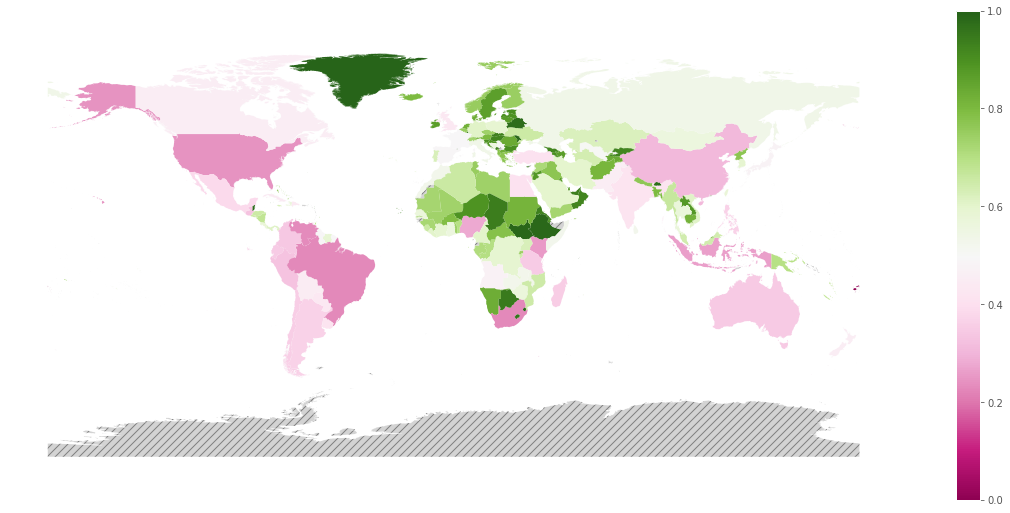

In [30]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='con_ratio_other_world',ax=ax, vmin=0,vmax=max(list(con_ratio_other_world.values())),legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Fraction of deaths caused by foreign demand',fontsize=24)
ax.axis('off')

### (number of domestic deaths / number of worldwide deaths) caused by the country

In [31]:
# mid = stats.percentileofscore(list(con_cause_ratio_dom_other.values()), 1)/max(list(con_cause_ratio_dom_other.values()))/100
# mid

In [32]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=np.mean(list(con_cause_ratio_dom_world.values())), name='shifted')

In [33]:
np.mean(list(con_cause_ratio_dom_world.values()))

0.28011314547339417

In [34]:
print(dict(sorted(con_cause_ratio_dom_world.items(), key=lambda item: item[1])))

{'FJI': 0.0, 'ROW': 0, 'GRL': 3.11221269448644e-08, 'BMU': 1.3039995283118296e-05, 'SMR': 1.4299076589111253e-05, 'CYM': 5.874397735954109e-05, 'VGB': 9.106142893424826e-05, 'LIE': 0.00014911114503337797, 'ABW': 0.0001599642892734449, 'MCO': 0.0010466416171898215, 'ATG': 0.00175746904075754, 'SYC': 0.0020637702896937546, 'BHR': 0.002930089851596774, 'AND': 0.005225536035783637, 'KWT': 0.0062777142767778465, 'ARE': 0.007670521193875181, 'LUX': 0.008487590544577994, 'OMN': 0.011017554264064647, 'QAT': 0.012149735193991179, 'BLZ': 0.013207491499309951, 'GUY': 0.016863451977334097, 'BTN': 0.018857426314169617, 'MLT': 0.021609026940680117, 'HKG': 0.023066096363658983, 'MAC': 0.023548036392564017, 'SGP': 0.024412876931031145, 'IRL': 0.024600086278094388, 'CYP': 0.025702691337272945, 'MDV': 0.025801244816193114, 'SDS': 0.028619860809579508, 'ISL': 0.030662788271657363, 'MNE': 0.03112121142082344, 'WSM': 0.03451614434063658, 'SWZ': 0.035777493176965436, 'LBY': 0.036520493511445776, 'BLR': 0.03

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

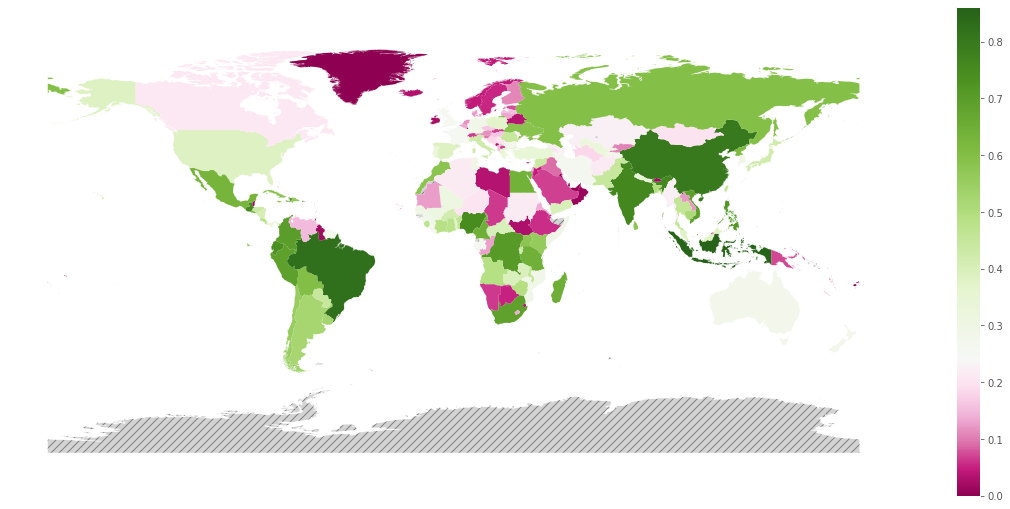

In [35]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='con_cause_ratio_dom_world',ax=ax, vmin=0,vmax=max(list(con_cause_ratio_dom_world.values())),legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Fraction of deaths caused by a country\'s consumption that occur in that country', fontsize=24)
ax.axis('off')

### (number of domestic deaths / number of foreign deaths) caused by the country

In [36]:
from scipy import stats

In [37]:
sorted((list(con_cause_ratio_dom_other.values()))).index(1.011428402472952)

152

In [38]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=(187-153)/187, name='shifted')

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

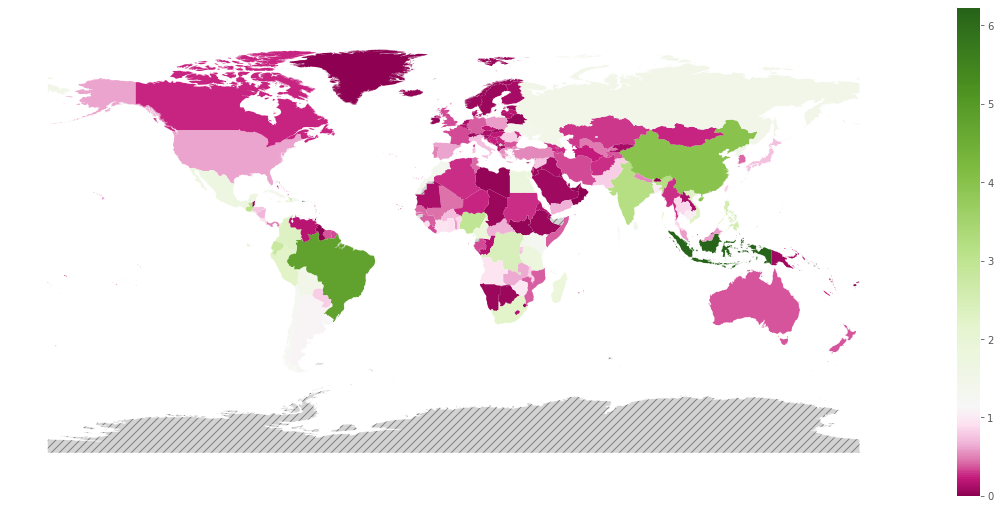

In [39]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='con_cause_ratio_dom_other',ax=ax, vmin=min(list(con_cause_ratio_dom_other.values())),vmax=max(list(con_cause_ratio_dom_other.values())),legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Ratio of deaths caused by a country\'s consumption that occur domestically and overseas', fontsize=22)
ax.axis('off')

In [40]:
print(dict(sorted(con_cause_ratio_dom_other.items(), key=lambda item: item[1])))

{'FJI': 0.0, 'ROW': 0, 'GRL': 3.112212791345121e-08, 'BMU': 1.3040165326812648e-05, 'SMR': 1.4299281055626236e-05, 'CYM': 5.8747428417145955e-05, 'VGB': 9.106972187325467e-05, 'LIE': 0.00014913338248280267, 'ABW': 0.00015998988194120057, 'MCO': 0.0010477382236185812, 'ATG': 0.001760563176033717, 'SYC': 0.0020680382455829393, 'BHR': 0.002938700508132535, 'AND': 0.005252985701864185, 'KWT': 0.006317372939069172, 'ARE': 0.00772981288745308, 'LUX': 0.0085602464110759, 'OMN': 0.011140293047230087, 'QAT': 0.012299166813886625, 'BLZ': 0.013384264053014662, 'GUY': 0.017152705808008793, 'BTN': 0.01921986347338742, 'MLT': 0.022086290180203822, 'HKG': 0.023610703116968727, 'MAC': 0.02411591892914771, 'SGP': 0.025023779377318908, 'IRL': 0.025220513075735283, 'CYP': 0.02638074754876538, 'MDV': 0.026484579947266575, 'SDS': 0.0294630903545467, 'ISL': 0.03163273616307906, 'MNE': 0.03212085122274325, 'WSM': 0.035750099950728094, 'SWZ': 0.03710501769435646, 'LBY': 0.037904795343853666, 'BLR': 0.03822547

### net_export_death

In [41]:
x, y = 0, 0
for i in import_of_death:
    x+=import_of_death[i]
    y+=net_export_death[i]
print(x,y)

-4.3655745685100555e-10 4.3655745685100555e-10


In [42]:
vmax = abs(import_of_death['BGD'])
vmin = -vmax #import_of_death['BGD']
mid = 0.5#1 - vmax / (vmax + abs(vmin))

In [43]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=stats.percentileofscore(list(import_of_death.values()), 0)/100, name='shifted')

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

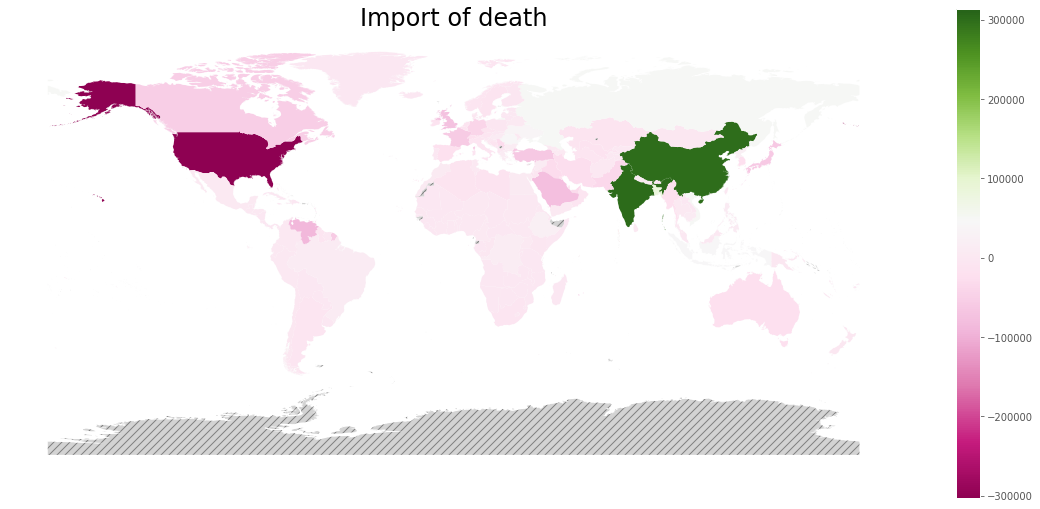

In [44]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='import_of_death',ax=ax, vmin=min(list(net_export_death.values())),vmax=max(list(net_export_death.values())),legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });



plt.title('Import of death', fontsize=24)
ax.axis('off')

In [45]:
stats.percentileofscore(list(net_export_death.values()), 0)

43.08510638297872

In [46]:
net_export_death['ARG']

7879.709400953645

'IND' 'BGD' 'VNM' 'UKR' 'ROU' 'PRK' 'ETH''NPL' 'KHM' 'COD' 'HUN' 'MDA' 'BGR' 'GEO' 'PSE', 'ARM' 'TJK' 'HTI' 'SLV' 'RWA' 'AFG' 'LSO' 'JAM' 'KGZ' 'UGA' 'GTM'
India, Bangladesh, Vietnam, Ukraine, North Korea, Ethiopia, 

In [47]:
stats.percentileofscore(list(net_export_death.values()), -2500)/100

0.2074468085106383

In [48]:
max(list(net_export_death.values())),min(list(net_export_death.values())),net_export_death['BGD']

(313990.55335332296, -302669.00859860145, -84322.96784743454)

In [49]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=0.5, name='shifted')

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

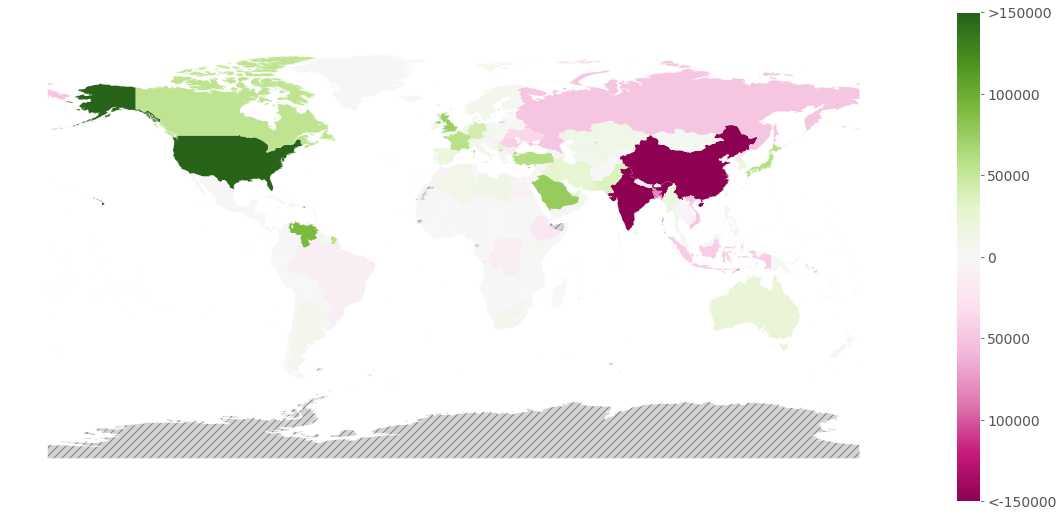

In [50]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='net_export_death',ax=ax, vmin=-150000,vmax=150000,legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
colourbar = ax.get_figure().get_axes()[1]
yticks = ['<-150000','100000','50000','0','50000','100000','>150000']

colourbar.set_yticklabels(yticks,fontsize=14)

# plt.title('Net export of death', fontsize=24)
ax.axis('off')

In [51]:
print(dict(sorted(death_export_ratio.items(), key=lambda item: item[1])))

{'MDA': 0.05812954554406572, 'PRK': 0.18669951734466367, 'ETH': 0.1937992053329803, 'KHM': 0.2110488135195315, 'ROU': 0.2337913324718068, 'BGD': 0.251203358769526, 'PSE': 0.2729568753595856, 'LSO': 0.2736606662619871, 'BGR': 0.2752126929650181, 'VNM': 0.28017964991403904, 'COD': 0.28059070757415483, 'HTI': 0.29478744367756693, 'GEO': 0.29967918826792306, 'SLV': 0.3265766559330576, 'CMR': 0.35636924549796667, 'SDS': 0.36560135226373436, 'BFA': 0.36974385464093645, 'UKR': 0.37099640659482014, 'CAF': 0.4095798256805995, 'HUN': 0.41166173595268807, 'JAM': 0.42377385465464856, 'UGA': 0.42646253205177925, 'IND': 0.43517688486570744, 'RWA': 0.43650624437247587, 'ARM': 0.4449778066812473, 'IDN': 0.447455484523864, 'ERI': 0.45856991447264644, 'NER': 0.4766212282909168, 'BEN': 0.5080145896218748, 'TJK': 0.5080497462705027, 'SYR': 0.5115240156653654, 'AZE': 0.5152636802321255, 'SWZ': 0.5329259371087733, 'GRC': 0.5404647206785574, 'YEM': 0.557612078516702, 'CHN': 0.5641367893158209, 'SLE': 0.56737

In [52]:
con_cause_dom_world['GRL']['OtherPartofWorld'],con_dom_world['GRL']['OtherPartofWorld']

(106.85491731089772, 0.0005823207370589374)

In [53]:
con_cause_dom_world['BMU']['OtherPartofWorld'],con_dom_world['BMU']['OtherPartofWorld']

(398.9093928186659, 45.354536931958215)

In [54]:
con_cause_dom_world['CYM']['OtherPartofWorld'],con_dom_world['CYM']['OtherPartofWorld']

(217.65115916708714, 51.277935232642115)

In [55]:
con_cause_dom_world['SYC']['OtherPartofWorld'],con_dom_world['SYC']['OtherPartofWorld']

(376.22295254298365, 60.0621151469994)

In [56]:
cmap = ListedColormap(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000'])
bounds = [0,1,10,50,100,600,1808677]
norm = BoundaryNorm(bounds, cmap.N)

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

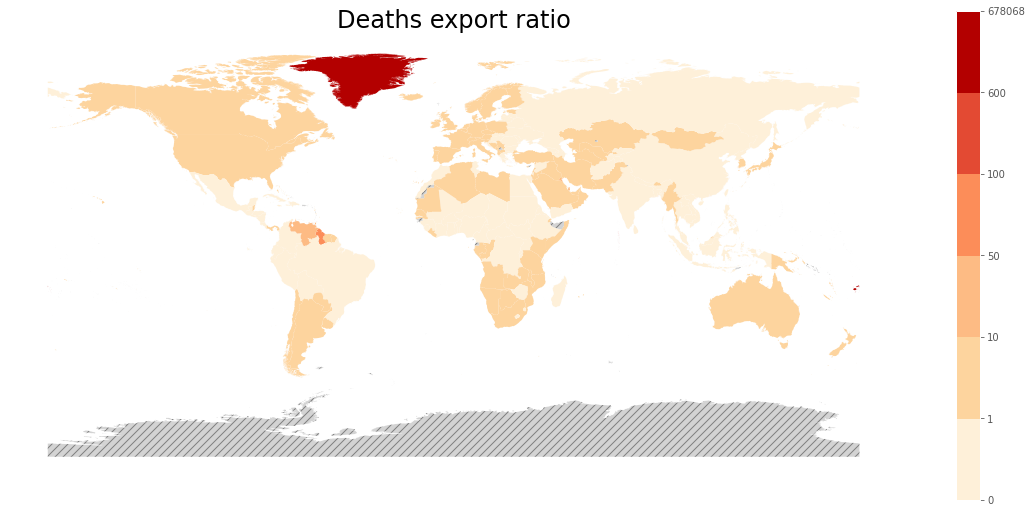

In [57]:
fig, ax = plt.subplots()
df_shp.plot(linewidths=0,column='death_export_ratio',ax=ax, vmin=min(list(death_export_ratio.values())),vmax=1,legend=True,cmap = cmap, norm = norm,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });

colourbar = ax.get_figure().get_axes()[1]

yticks = ['0','1','10','50','100','600','678068']

colourbar.set_yticklabels(yticks)

plt.title('Deaths export ratio', fontsize=24)
ax.axis('off')

(-197.99999999999991, 198.0, -98.68170503264994, 92.31580568565006)

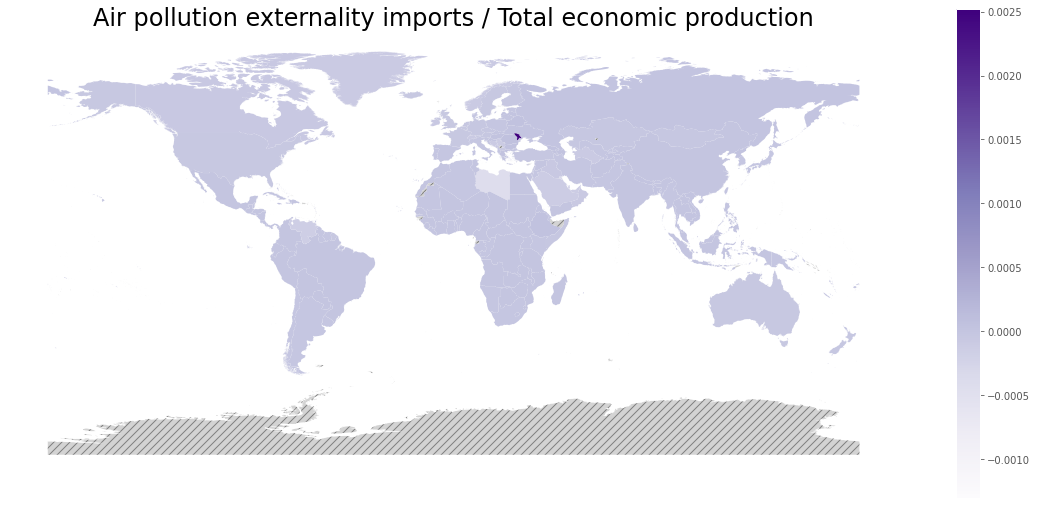

In [58]:
fig, ax = plt.subplots(1, 1)
df_shp.plot(linewidths=0,column='import_production',ax=ax, vmin=min(list(import_production.values())),vmax=max(list(import_production.values())),legend=True,cmap = 'Purples',missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
plt.title("Air pollution externality imports / Total economic production", fontsize=24)
ax.axis('off')

In [59]:
net_export_death
death_export_ratio
import_of_death
import_production # "Air pollution externality imports / Total economic production"

{'AFG': 2.021720585831841e-06,
 'ALB': -1.6810223535132136e-05,
 'DZA': -1.215993225862684e-05,
 'AND': -7.301902425307947e-05,
 'AGO': -2.0444728024009014e-06,
 'ATG': -1.4838528404697951e-05,
 'ARG': -7.384762689181508e-06,
 'ARM': 3.087628384825399e-05,
 'ABW': -5.079276079098322e-05,
 'AUS': -4.253358349343545e-05,
 'AUT': -2.948879851230258e-05,
 'AZE': 3.0547250159116164e-05,
 'BHS': -6.155503973748397e-06,
 'BHR': -4.171292926804384e-05,
 'BGD': 1.7884292409080785e-05,
 'BRB': -8.343640560649307e-06,
 'BLR': 5.2100867410196715e-05,
 'BEL': -3.5053677145033796e-05,
 'BLZ': -3.7700555204994014e-06,
 'BEN': 5.6516263401586e-06,
 'BMU': -0.00029077470651470963,
 'BTN': -7.417289302333607e-06,
 'BOL': 2.2312829410772714e-06,
 'BIH': -8.337430626054084e-05,
 'BWA': -5.032805246165974e-07,
 'BRA': 2.6333526876976333e-06,
 'VGB': -2.3310414609876873e-05,
 'BRN': -4.1517213034948266e-05,
 'BGR': 5.305295235664509e-05,
 'BFA': 4.316547207715569e-06,
 'BDI': 2.0461159326440643e-06,
 'KHM':

In [60]:
print(dict(sorted(death_export_ratio.items(), key=lambda item: item[1])))

{'MDA': 0.05812954554406572, 'PRK': 0.18669951734466367, 'ETH': 0.1937992053329803, 'KHM': 0.2110488135195315, 'ROU': 0.2337913324718068, 'BGD': 0.251203358769526, 'PSE': 0.2729568753595856, 'LSO': 0.2736606662619871, 'BGR': 0.2752126929650181, 'VNM': 0.28017964991403904, 'COD': 0.28059070757415483, 'HTI': 0.29478744367756693, 'GEO': 0.29967918826792306, 'SLV': 0.3265766559330576, 'CMR': 0.35636924549796667, 'SDS': 0.36560135226373436, 'BFA': 0.36974385464093645, 'UKR': 0.37099640659482014, 'CAF': 0.4095798256805995, 'HUN': 0.41166173595268807, 'JAM': 0.42377385465464856, 'UGA': 0.42646253205177925, 'IND': 0.43517688486570744, 'RWA': 0.43650624437247587, 'ARM': 0.4449778066812473, 'IDN': 0.447455484523864, 'ERI': 0.45856991447264644, 'NER': 0.4766212282909168, 'BEN': 0.5080145896218748, 'TJK': 0.5080497462705027, 'SYR': 0.5115240156653654, 'AZE': 0.5152636802321255, 'SWZ': 0.5329259371087733, 'GRC': 0.5404647206785574, 'YEM': 0.557612078516702, 'CHN': 0.5641367893158209, 'SLE': 0.56737